# Introducción a Tensor Flow...

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
x1 = tf.constant([1, 2, 3, 4, 5])
x2 = tf.constant([6, 7, 8, 9, 10]) 

In [3]:
res = tf.multiply(x1, x2)
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [4]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [5]:
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [6]:
config = tf.ConfigProto(log_device_placement = True)

In [7]:
config = tf.ConfigProto(allow_soft_placement = True)

## Aprendizaje neuronal de las señales de tráfico...

In [8]:
import os
import skimage .data as imd

In [9]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory, d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
        
    return images, labels

In [10]:
main_dir = "D:/datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [11]:
images, labels = load_ml_data(train_data_dir)

In [12]:
images = np.array(images)

In [13]:
labels = np.array(labels)

In [14]:
images.size

4575

In [15]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [16]:
labels.ndim

1

In [17]:
labels.size

4575

In [18]:
len(set(labels))

62

In [19]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [20]:
images.itemsize

8

In [21]:
images.nbytes

36600

In [22]:
images.nbytes / images.itemsize

4575.0

In [23]:
import matplotlib.pyplot as plt

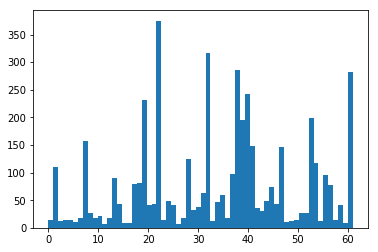

In [24]:
plt.hist(labels, len(set(labels)))
plt.show()

In [25]:
import random

In [26]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[3704, 374, 828, 531, 1832, 1982]

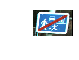

Forma:(110, 171, 3), min:0, max255


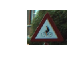

Forma:(88, 100, 3), min:5, max255


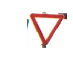

Forma:(73, 76, 3), min:33, max255


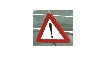

Forma:(235, 260, 3), min:0, max255


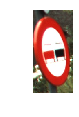

Forma:(205, 98, 3), min:6, max255


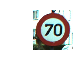

Forma:(117, 116, 3), min:0, max255


In [27]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1, 6, i + 1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max{2}".format(temp_im.shape, temp_im.min(), temp_im.max()))

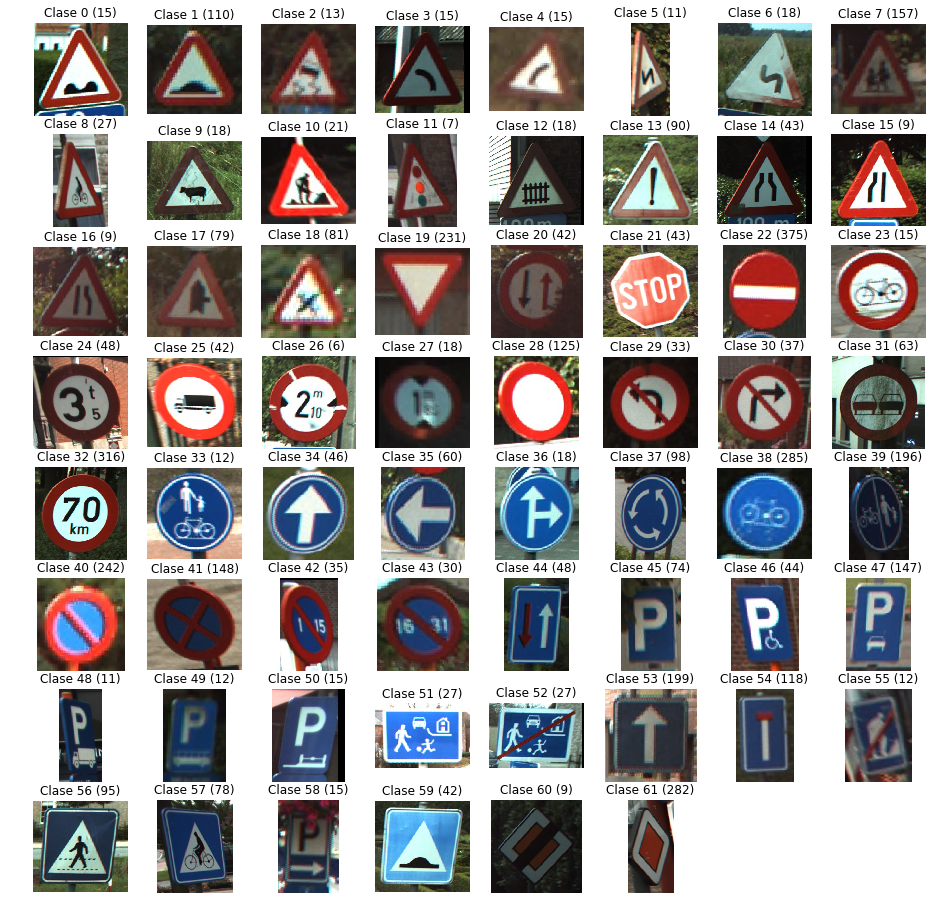

In [28]:
unique_labels = set(labels)
plt.figure(figsize = (16, 16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8, 8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i += 1
    plt.imshow(temp_im)
plt.show()

## Modelo de red neuronal con TensorFlow...
* Las imágenes no todas son del mismo tamaño.
* Hay 62 clases de imágenes (desde la 0 hasta la 61).
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras).

In [29]:
from skimage import transform

In [30]:
w = 99999
h = 99999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h, w))

Tamaño mínimo: 22x20


In [98]:
images120 = [transform.resize(image, (120, 120)) for image in images]

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [99]:
len(images120)

4575

In [100]:
images120[0]

array([[[0.8213125 , 0.976971  , 0.90270629],
        [0.79472426, 0.92277451, 0.76086275],
        [0.73700163, 0.65637051, 0.49400735],
        ...,
        [0.19571895, 0.22723243, 0.15094158],
        [0.20759436, 0.24513971, 0.16730025],
        [0.22110989, 0.25607721, 0.17833211]],

       [[0.81460417, 0.97760008, 0.91828268],
        [0.81526593, 0.92852328, 0.78221078],
        [0.74229167, 0.63689542, 0.48680147],
        ...,
        [0.18697508, 0.21496324, 0.14328023],
        [0.19503799, 0.22435172, 0.15296814],
        [0.20216585, 0.22978758, 0.15919935]],

       [[0.78893791, 0.95689951, 0.91331904],
        [0.80015319, 0.89214461, 0.76713235],
        [0.74778391, 0.62160948, 0.48479371],
        ...,
        [0.18158701, 0.20418709, 0.13632557],
        [0.18295343, 0.20601103, 0.13589461],
        [0.18308824, 0.20862132, 0.13803309]],

       ...,

       [[0.0448366 , 0.11390931, 0.11779003],
        [0.12042279, 0.25310662, 0.31601716],
        [0.25081699, 0

In [101]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[1429, 3616, 1884, 2699, 1231, 3628]

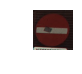

Forma:(120, 120, 3), min:0.035294117647058934, max0.7975490196078205


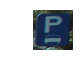

Forma:(120, 120, 3), min:0.0196078431372549, max0.8912602124182992


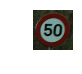

Forma:(120, 120, 3), min:0.00018382352941178563, max0.7045302287581705


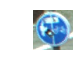

Forma:(120, 120, 3), min:0.02659681372548952, max1.0


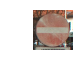

Forma:(120, 120, 3), min:0.07059980936819224, max1.0


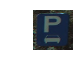

Forma:(120, 120, 3), min:0.04420649509804063, max0.9654319852941234


In [102]:
for i in range(len(rand_signs)):
    temp_im = images120[rand_signs[i]]
    plt.subplot(1, 6, i + 1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max{2}".format(temp_im.shape, temp_im.min(), temp_im.max()))

* Convertir a escala de grises...

In [103]:
from skimage.color import rgb2gray

In [104]:
images120 = np.array(images120)
images120 = rgb2gray(images120)

In [105]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[2227, 182, 1502, 3179, 2842, 2145]

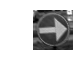

Forma:(120, 120), min:0.08332858741829921, max0.9637400215822444


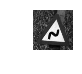

Forma:(120, 120), min:0.08199934967320247, max0.7769617745098039


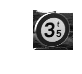

Forma:(120, 120), min:0.054271463480392364, max1.0


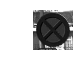

Forma:(120, 120), min:0.04867427512254941, max0.9998945637867647


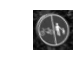

Forma:(120, 120), min:0.030892582107842705, max0.6647215915032677


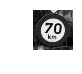

Forma:(120, 120), min:0.054594132080609675, max0.809386105664489


In [106]:
for i in range(len(rand_signs)):
    temp_im = images120[rand_signs[i]]
    plt.subplot(1, 6, i + 1)
    plt.axis("off")
    plt.imshow(temp_im, cmap = "gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max{2}".format(temp_im.shape, temp_im.min(), temp_im.max()))

In [131]:
# Construimos los placeholder.
x = tf.placeholder(dtype = tf.float32, shape = [None, 120, 120])
y = tf.placeholder(dtype = tf.int32, shape = [None])
# Construimos la red neuronal.
images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

train_opt =  tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

final_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

In [132]:
images_flat

<tf.Tensor 'Flatten_4/flatten/Reshape:0' shape=(?, 14400) dtype=float32>

In [133]:
logits

<tf.Tensor 'fully_connected_4/Relu:0' shape=(?, 62) dtype=float32>

In [134]:
loss

<tf.Tensor 'Mean_8:0' shape=() dtype=float32>

In [135]:
final_pred

<tf.Tensor 'ArgMax_4:0' shape=(?,) dtype=int64>

* Ejecutar la red neuronal que creamos con ayuda de una sesión.

In [136]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
    #print("EPOCH", i)
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict = {
                                  x: images120,
                                  y: list(labels)
                              })
    _, loss_val = sess.run([train_opt, loss],
                              feed_dict = {
                                  x: images120,
                                  y: list(labels)
                              })
    
    if i % 50 == 0:
        print("EPOCH ", i)
        print("Eficacia: ", accuracy_val)
        print("Pérdidas: ", loss_val)
    #print("Fin del Ecpoh ", i)

EPOCH  0
Eficacia:  40.17224
Pérdidas:  4.786194
EPOCH  50
Eficacia:  37.758034
Pérdidas:  2.2349718
EPOCH  100
Eficacia:  35.215958
Pérdidas:  2.0932224
EPOCH  150
Eficacia:  34.093334
Pérdidas:  2.0302541
EPOCH  200
Eficacia:  32.82601
Pérdidas:  1.9913727


## Evaluación de la red neuronal...

In [156]:
sample_idx = random.sample(range(len(images120)), 50)
sample_images = [images120[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [157]:
prediction = sess.run([final_pred], feed_dict = {
    x: sample_images
})[0]

In [158]:
prediction

array([40,  0, 53, 13, 61, 40, 32, 22, 19,  0, 53, 19, 19, 32, 19, 19, 40,
       32, 40, 40, 40, 38, 32, 32, 32, 57, 61, 39, 22, 61, 39, 32, 17, 22,
       13,  0, 61, 32,  0, 32, 61, 19, 40, 40, 37, 38,  0, 40, 19, 61],
      dtype=int64)

In [159]:
sample_labels

[41,
 0,
 53,
 10,
 50,
 41,
 20,
 22,
 19,
 5,
 53,
 19,
 19,
 32,
 34,
 19,
 41,
 32,
 40,
 40,
 47,
 38,
 32,
 28,
 32,
 57,
 61,
 39,
 22,
 42,
 39,
 52,
 17,
 22,
 13,
 45,
 31,
 32,
 47,
 28,
 61,
 19,
 22,
 41,
 37,
 38,
 12,
 36,
 19,
 61]

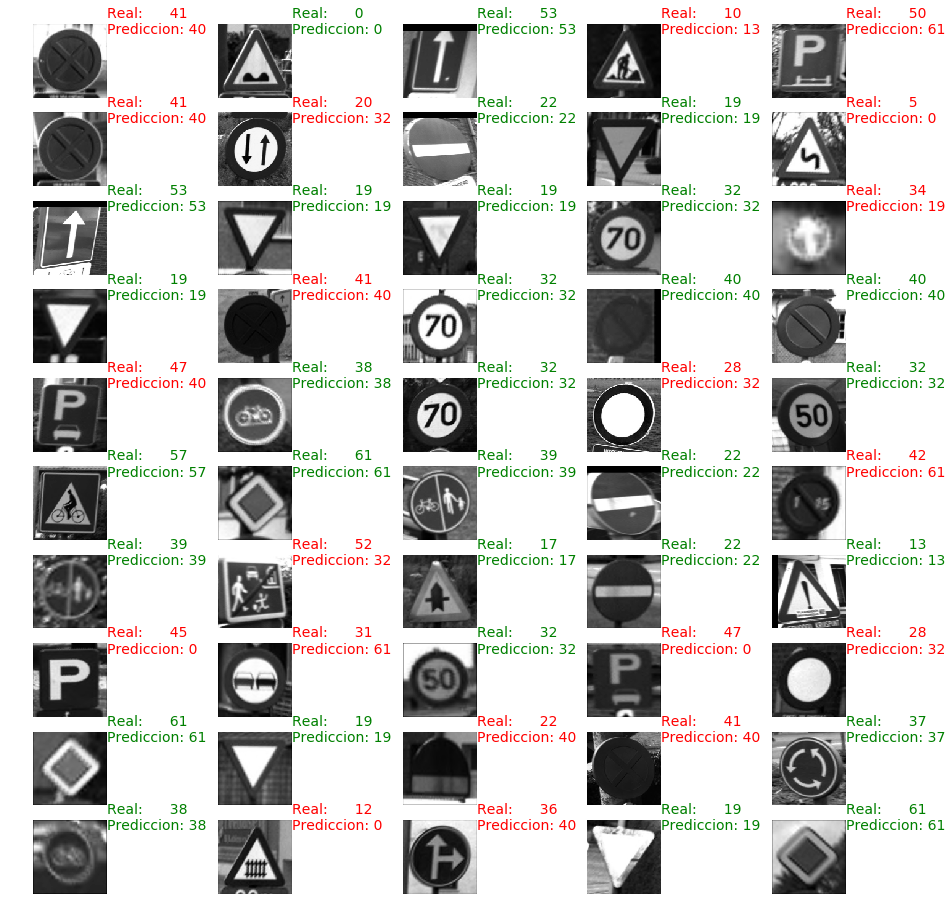

In [160]:
plt.figure(figsize = (16, 16))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10, 5, i + 1)
    plt.axis("off")
    color = "green" if truth == predi else "red"
    plt.text(120, 15, "Real:      {0}\nPrediccion: {1}".format(truth, predi), fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap = "gray")
plt.show()

In [161]:
test_images, test_labels = load_ml_data(test_data_dir)

In [162]:
test_images120 = [transform.resize(im, (120, 120)) for im in test_images]

In [163]:
test_images120 = rgb2gray(np.array(test_images120))

In [164]:
len(test_images120)

2520

In [165]:
prediction = sess.run([final_pred], feed_dict = {x: test_images120})[0]

In [166]:
len(prediction)

2520

In [167]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1414

In [168]:
acc = match_count / len(test_labels) * 100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 56.11
